In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import scipy.stats 
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_test=pd.read_csv("bigdatamart_Test.csv")

df_train=pd.read_csv("bigdatamart_Train.csv")

# combine both test and train data to handle missing values

df_tr = pd.concat([df_test, df_train], ignore_index = True ) 

df_tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df_tr.shape

(14204, 12)

In [7]:
df_tr.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
# Item_Outlet_Sales is our target variable for sales prediction and 39 % of its values are NaN
# as it is not present in train dataset so we wont impute the data in column.

tot_nan = 2439 + 4016
percent_nan = tot_nan / (14204 * 12) * 100
round(percent_nan, 2)

3.79

In [9]:
# Imputing Missing Values for Item_Weight

# Since Item_Weight depends on Item_Type, NaNs is replaced with mean of Item_Weight values corresponding to the respective Item_Type names

lis_it_ty = list(set(df_tr ["Item_Type"]))

lis_it_ty

['Snack Foods',
 'Others',
 'Frozen Foods',
 'Meat',
 'Dairy',
 'Starchy Foods',
 'Hard Drinks',
 'Breakfast',
 'Baking Goods',
 'Seafood',
 'Household',
 'Health and Hygiene',
 'Fruits and Vegetables',
 'Canned',
 'Soft Drinks',
 'Breads']

In [10]:
dict_it_ty_wt = dict.fromkeys(lis_it_ty, [])

d1 = dict.fromkeys(lis_it_ty, 0)

for i in range (0, 8523):
    dict_it_ty_wt[df_tr["Item_Type"][i]].append(df_tr["Item_Weight"][i])

#Dictionary of Item_Type with Item_Type names as keys and list of corresponding Item_Weight values as values
dict_it_ty_wt

{'Snack Foods': [20.75,
  8.3,
  14.6,
  7.315,
  nan,
  9.8,
  19.35,
  nan,
  6.305,
  5.985,
  16.6,
  6.59,
  nan,
  4.785,
  16.75,
  6.135,
  19.85,
  17.85,
  nan,
  13.6,
  7.1,
  19.2,
  13.65,
  nan,
  19.2,
  6.785,
  13.0,
  5.825,
  13.8,
  12.8,
  nan,
  9.5,
  12.5,
  nan,
  5.78,
  nan,
  nan,
  10.395,
  18.35,
  nan,
  21.1,
  19.75,
  8.43,
  15.35,
  6.71,
  10.195,
  11.65,
  12.85,
  12.15,
  18.25,
  5.98,
  12.65,
  13.1,
  20.7,
  nan,
  7.855,
  13.35,
  17.25,
  nan,
  10.395,
  8.315,
  20.7,
  nan,
  21.35,
  5.88,
  nan,
  7.435,
  14.65,
  14.0,
  18.2,
  17.6,
  nan,
  7.71,
  7.81,
  16.35,
  13.0,
  nan,
  13.35,
  nan,
  16.1,
  17.85,
  5.34,
  5.51,
  6.61,
  6.38,
  16.1,
  13.65,
  19.2,
  8.71,
  17.75,
  19.35,
  nan,
  nan,
  6.44,
  12.6,
  7.935,
  18.25,
  18.5,
  6.035,
  11.8,
  6.26,
  16.5,
  15.7,
  6.635,
  nan,
  nan,
  nan,
  14.0,
  nan,
  17.75,
  17.75,
  8.155,
  17.25,
  nan,
  6.175,
  nan,
  8.18,
  8.355,
  6.905,
  20.35,
  

In [11]:
import statistics

for j in dict_it_ty_wt:
   d1[j] = np.nanmean(dict_it_ty_wt[j])

#Dictionay with Item_Type as keys and corresponding mean of Item_Weight as values
print(d1)

{'Snack Foods': 12.794351420093259, 'Others': 12.794351420093259, 'Frozen Foods': 12.794351420093259, 'Meat': 12.794351420093259, 'Dairy': 12.794351420093259, 'Starchy Foods': 12.794351420093259, 'Hard Drinks': 12.794351420093259, 'Breakfast': 12.794351420093259, 'Baking Goods': 12.794351420093259, 'Seafood': 12.794351420093259, 'Household': 12.794351420093259, 'Health and Hygiene': 12.794351420093259, 'Fruits and Vegetables': 12.794351420093259, 'Canned': 12.794351420093259, 'Soft Drinks': 12.794351420093259, 'Breads': 12.794351420093259}


In [12]:
import math

for k in range (0,8523):
    if math.isnan(df_tr["Item_Weight"][k]):
        df_tr["Item_Weight"].replace(to_replace = df_tr["Item_Weight"][k], value = d1[df_tr["Item_Type"][k]], inplace = True) 

# Replace NaN with mean

df_tr["Item_Weight"].isna().sum() #s um of nan after imputing nan values

0

In [14]:
#Impute Missing Values from Outlet_Size, Since Outlet_Size depends on Outlet_Type, NaNs in Outlet_Size is replaced with the mode of Outlet_Size values corresponding to respective Outlet_Type names

lis_out_ty = list(set(df_tr["Outlet_Type"]))


#list of Outlet_Type
lis_out_ty

['Supermarket Type1',
 'Grocery Store',
 'Supermarket Type3',
 'Supermarket Type2']

In [15]:
dict_out_ty_sz = dict.fromkeys(lis_out_ty,[])

d2 = dict.fromkeys(lis_out_ty, 0)

for i in range (0,8523):
    dict_out_ty_sz[df_tr["Outlet_Type"][i]].append(df_tr["Outlet_Size"][i])

dict_out_ty_sz

import scipy as stats

df_out_ty_sz = pd.DataFrame(dict_out_ty_sz)


#calculating the mode of the Outlet_Size corresponding to Outlet_Type
df_out_ty_sz.mode(dropna = True) 

,Supermarket Type1,Grocery Store,Supermarket Type3,Supermarket Type2
0,Medium,Medium,Medium,Medium


In [16]:
import math

df_tr["Outlet_Size"].fillna("Medium",inplace = True) 

#nan count after imputing Outlet_Size's nan values
df_tr["Outlet_Size"].isna().sum()

0

In [17]:
df_tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN
4,FDY38,12.794351,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
14200,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
14201,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
14202,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


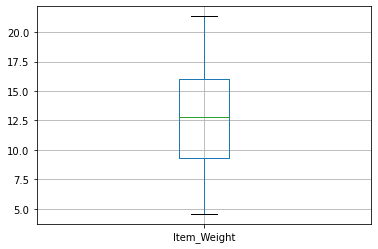

In [18]:
df_tr.boxplot(column = 'Item_Weight', return_type = 'axes');

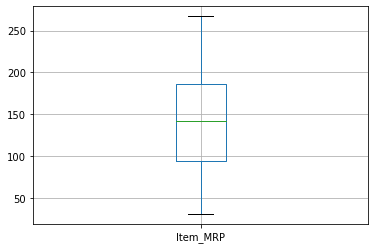

In [19]:
df_tr.boxplot(column = 'Item_MRP', return_type = 'axes');

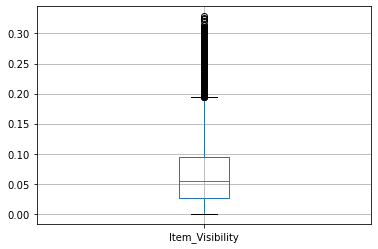

In [20]:
df_tr.boxplot(column = 'Item_Visibility', return_type = 'axes');

In [ ]:
# Item_Visibility might have some outliers

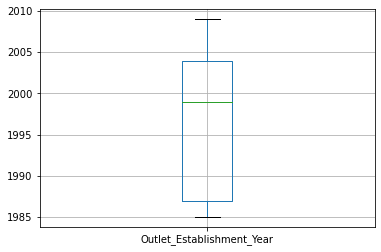

In [21]:
df_tr.boxplot(column = 'Outlet_Establishment_Year', return_type = 'axes');

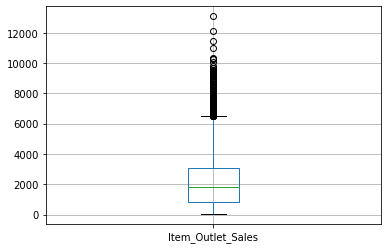

In [22]:
df_tr.boxplot(column = 'Item_Outlet_Sales', return_type = 'axes');

In [ ]:
# Item_Outlet_Sales might have some outliers

In [23]:
#Change categories of low fat:

print('Original content:')

print(df_tr['Item_Fat_Content'].value_counts())

print ('\nModified Content:')

df_tr['Item_Fat_Content'] = df_tr['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print( df_tr['Item_Fat_Content'].value_counts())

Original content:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Content:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [24]:
# lets Normalize and Standardize the data

df_num = df_tr.select_dtypes(include = [np.number])

df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,20.750000,0.007565,107.8622,1999,NaN
1,8.300000,0.038428,87.3198,2007,NaN
2,14.600000,0.099575,241.7538,1998,NaN
3,7.315000,0.015388,155.0340,2007,NaN
4,12.794351,0.118599,234.2300,1985,NaN
...,...,...,...,...,...
14199,6.865000,0.056783,214.5218,1987,2778.3834
14200,8.380000,0.046982,108.1570,2002,549.2850
14201,10.600000,0.035186,85.1224,2004,1193.1136
14202,7.210000,0.145221,103.1332,2009,1845.5976


In [25]:
#Normalizing columns

from sklearn import preprocessing

x = df_num.values 

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_norm = pd.DataFrame(x_scaled)

df_norm.rename(columns = {"0": "Item_MRP", 
                     "1":"Item_Outlet_Sales","2":"Item_Visibility","3":"Item_Weight","4":"Outlet_Establishment_Year"}, 
                                 inplace = True)

df_norm.columns = ["Item_MRP","Item_Outlet_Sales","Item_Visibility","Item_Weight","Outlet_Establishment_Year"] 

df_norm

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,0.964275,0.023036,0.325012,0.583333,NaN
1,0.222983,0.117018,0.237819,0.916667,NaN
2,0.598095,0.303221,0.893316,0.541667,NaN
3,0.164335,0.046860,0.525233,0.916667,NaN
4,0.490584,0.361153,0.861381,0.000000,NaN
...,...,...,...,...,...
14199,0.137541,0.172914,0.777729,0.083333,0.210293
14200,0.227746,0.143069,0.326263,0.708333,0.039529
14201,0.359929,0.107148,0.228492,0.791667,0.088850
14202,0.158083,0.442219,0.304939,1.000000,0.138835


In [26]:
#Standardization of normalized columns

names = df_norm.columns

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df_norm)

scaled_df = pd.DataFrame(scaled_df, columns = names)

scaled_df

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,1.879250,-1.134699,-0.533831,0.139681,NaN
1,-1.061178,-0.534917,-0.864708,1.095319,NaN
2,0.426749,0.653405,1.622763,0.020226,NaN
3,-1.293815,-0.982657,0.225966,1.095319,NaN
4,0.000293,1.023121,1.501577,-1.532686,NaN
...,...,...,...,...,...
14199,-1.400095,-0.178196,1.184137,-1.293777,0.349915
14200,-1.042284,-0.368666,-0.529083,0.498045,-0.956402
14201,-0.517967,-0.597910,-0.900101,0.736955,-0.579100
14202,-1.318613,1.540475,-0.610001,1.334228,-0.196725


In [27]:
# numerical columns with mean 0
round(scaled_df.mean(), 2)

Item_MRP                     0.0
Item_Outlet_Sales            0.0
Item_Visibility              0.0
Item_Weight                 -0.0
Outlet_Establishment_Year    0.0
dtype: float64

In [28]:
# numerical columns with std deviation 1
round(scaled_df.std(), 2)

Item_MRP                     1.0
Item_Outlet_Sales            1.0
Item_Visibility              1.0
Item_Weight                  1.0
Outlet_Establishment_Year    1.0
dtype: float64

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

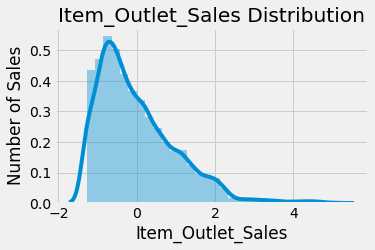

In [29]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (5, 3))

sns.distplot(scaled_df.Item_Outlet_Sales, bins = 30)

plt.ticklabel_format(style = 'plain', axis = 'x', scilimits = (0, 1))

plt.xlabel("Item_Outlet_Sales")

plt.ylabel("Number of Sales")

plt.title("Item_Outlet_Sales Distribution")

In [33]:
#split the train and test datasets

train = df_tr.loc[df_tr['Item_Outlet_Sales']!="NaN"]

test = df_tr.loc[df_tr['Item_Outlet_Sales'] == "NaN"]

#Dropping unnecessary columns
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

#Export files as modified versions:

train.to_csv(r"train_modified.csv", index = False)

test.to_csv(r"test_modified.csv", index = False)

print(train.head())

print(test.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58    20.750000          Low Fat         0.007565  Snack Foods   
1           FDW14     8.300000          Regular         0.038428        Dairy   
2           NCN55    14.600000          Low Fat         0.099575       Others   
3           FDQ58     7.315000          Low Fat         0.015388  Snack Foods   
4           FDY38    12.794351          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007      Medium   
2  241.7538            OUT010                       1998      Medium   
3  155.0340            OUT017                       2007      Medium   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               T

In [34]:
it_out_sales_drpna = train["Item_Outlet_Sales"].dropna()

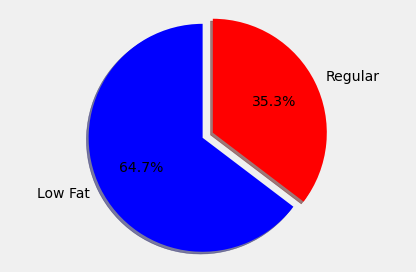

In [35]:
# Graph Visualization
# Univariate Analysis

labels = train['Item_Fat_Content'].unique()

sizes = list(train['Item_Fat_Content'].value_counts())

explode = (0, 0.1)

#add colors

colors = ['blue','red']

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)

ax1.axis('equal')

plt.tight_layout()

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Baking Goods'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Breads'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Household'),
  Text(11, 0, 'Frozen Foods'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Canned'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Breakfast')])

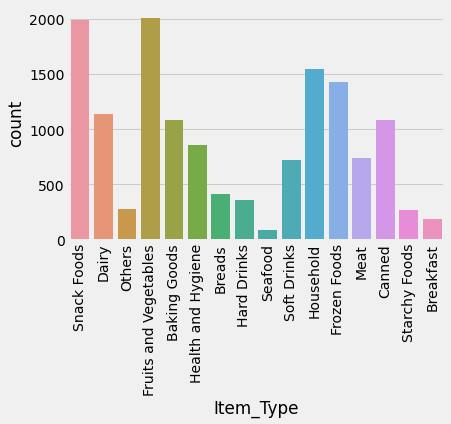

In [36]:
# Visualizing Item_Type

sns.countplot(train.Item_Type)

plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Item_MRP'>

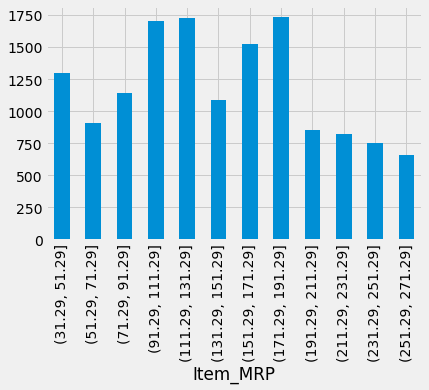

In [37]:
#Visualizing Item_MRP

def createList(r1, r2): 
    return np.arange(r1, r2+20, 20) 

r1, r2 = min(train['Item_MRP']), max(train['Item_MRP'])  

bins = createList(r1, r2)

df_itmrp = train.groupby(pd.cut(train['Item_MRP'], bins = bins)).Item_MRP.count()

df_itmrp.plot(kind='bar')

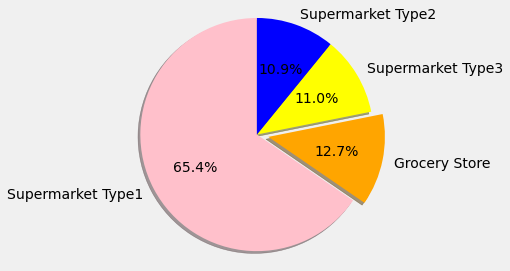

In [39]:
# Visualizing Outlet_Type

labels = train['Outlet_Type'].unique()

sizes = list(train['Outlet_Type'].value_counts())

explode = (0, 0.1, 0, 0)

colors = ['pink','orange','yellow','blue']

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = '%1.1f%%', shadow = True, startangle = 90)

ax1.axis('equal')

plt.tight_layout()

plt.show()

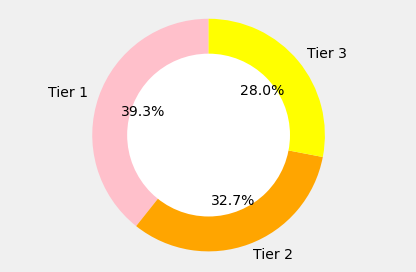

In [40]:
# Pie chart

labels = train['Outlet_Location_Type'].unique()

sizes =  list(train['Outlet_Location_Type'].value_counts())

colors = ['pink','orange','yellow']
 
fig1, ax1 = plt.subplots()

ax1.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 90)

centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures pie is drawn as a circle

ax1.axis('equal')  

plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

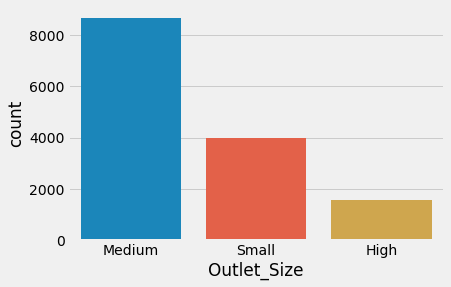

In [41]:
sns.countplot(train.Outlet_Size)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

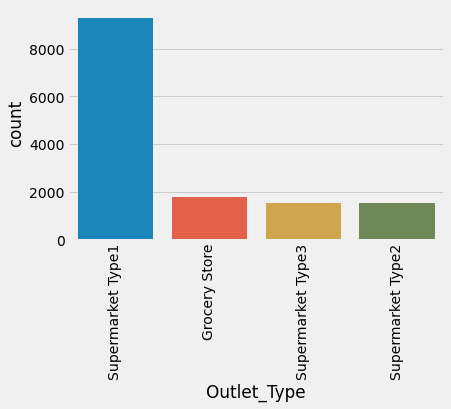

In [42]:
sns.countplot(train.Outlet_Type)

plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

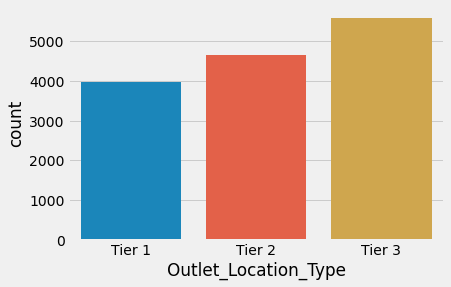

In [43]:
sns.countplot(train.Outlet_Location_Type)

# Bivariate Analysis 

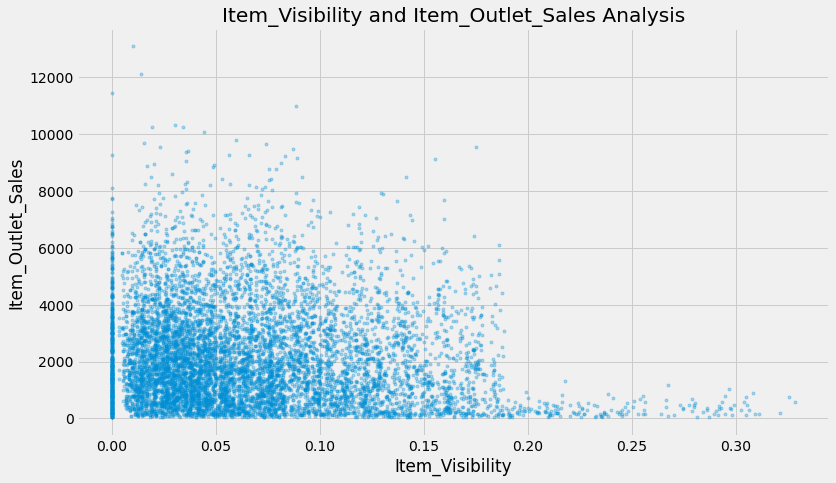

In [44]:
# Check the impact of Item_Visibility on Item_Outlet_Sales

plt.figure(figsize = (12, 7))

plt.xlabel("Item_Visibility")

plt.ylabel("Item_Outlet_Sales")

plt.title("Item_Visibility and Item_Outlet_Sales Analysis")

plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"], '.', alpha = 0.3)

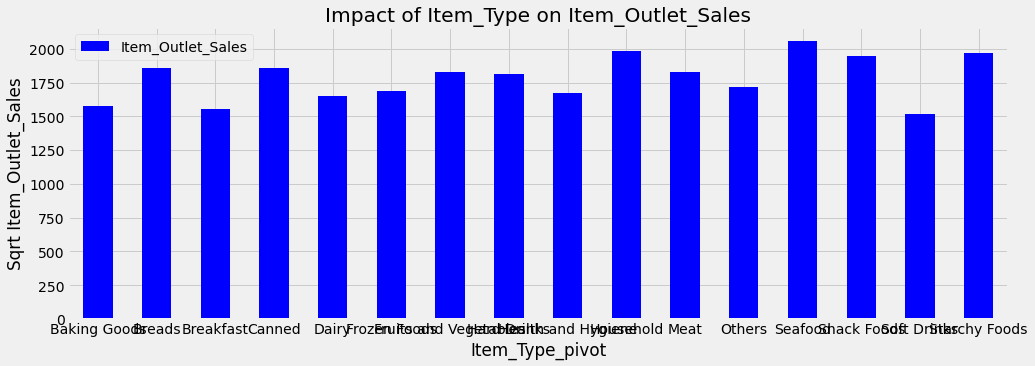

In [52]:
# Impact of Item_Visibility on Item_Outlet_Sales

Item_Type_pivot = train.pivot_table(index = 'Item_Type', values = "Item_Outlet_Sales", aggfunc = np.median)

Item_Type_pivot.plot(kind = 'bar', color = 'blue', figsize = (15, 5))

plt.xlabel("Item_Type_pivot")

plt.ylabel("Sqrt Item_Outlet_Sales")

plt.title("Impact of Item_Type on Item_Outlet_Sales")

plt.xticks(rotation=0)

plt.show()

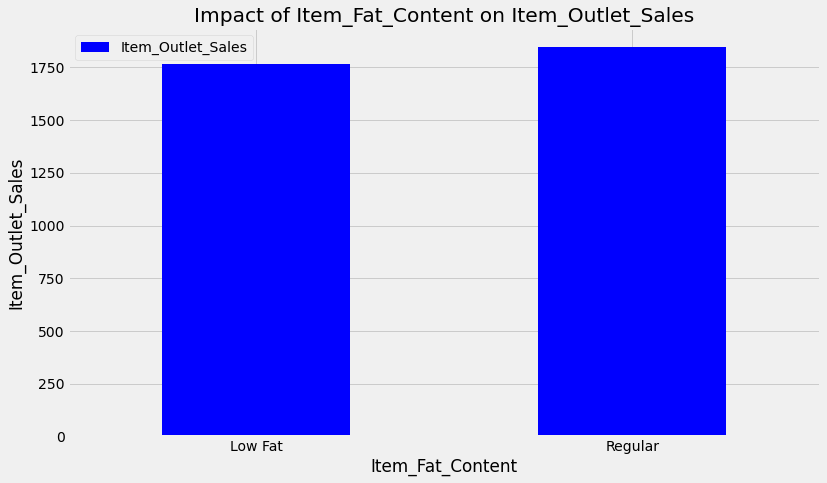

In [53]:
# Impact of Item_Fat_Content on Item_Outlet_Sales
Item_Fat_Content_pivot = train.pivot_table(index = 'Item_Fat_Content', values = "Item_Outlet_Sales", aggfunc = np.median)

Item_Fat_Content_pivot.plot(kind = 'bar', color = 'blue',figsize=(12,  7 ))

plt.xlabel("Item_Fat_Content")

plt.ylabel("Item_Outlet_Sales")

plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")

plt.xticks(rotation = 0)

plt.show()

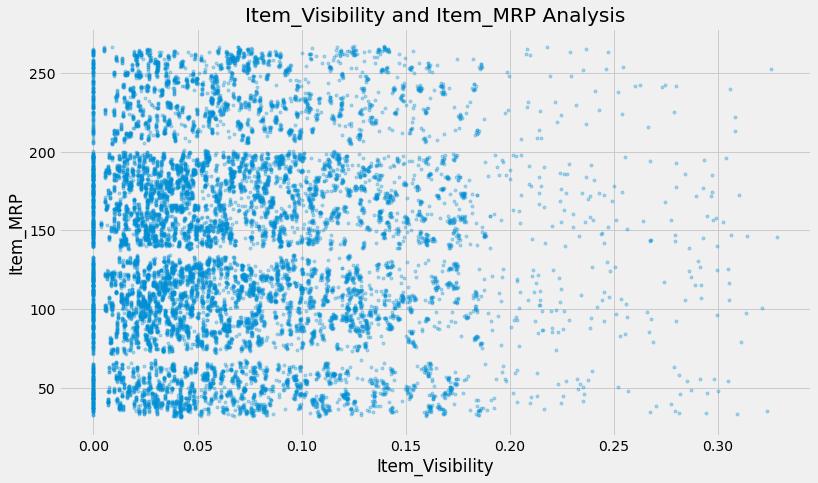

In [54]:
# impact of Item_Visibility on Item_MRP

plt.figure(figsize = (12, 7))

plt.xlabel("Item_Visibility")

plt.ylabel("Item_MRP")

plt.title("Item_Visibility and Item_MRP Analysis")

plt.plot(train.Item_Visibility, train["Item_MRP"], '.', alpha = 0.3)

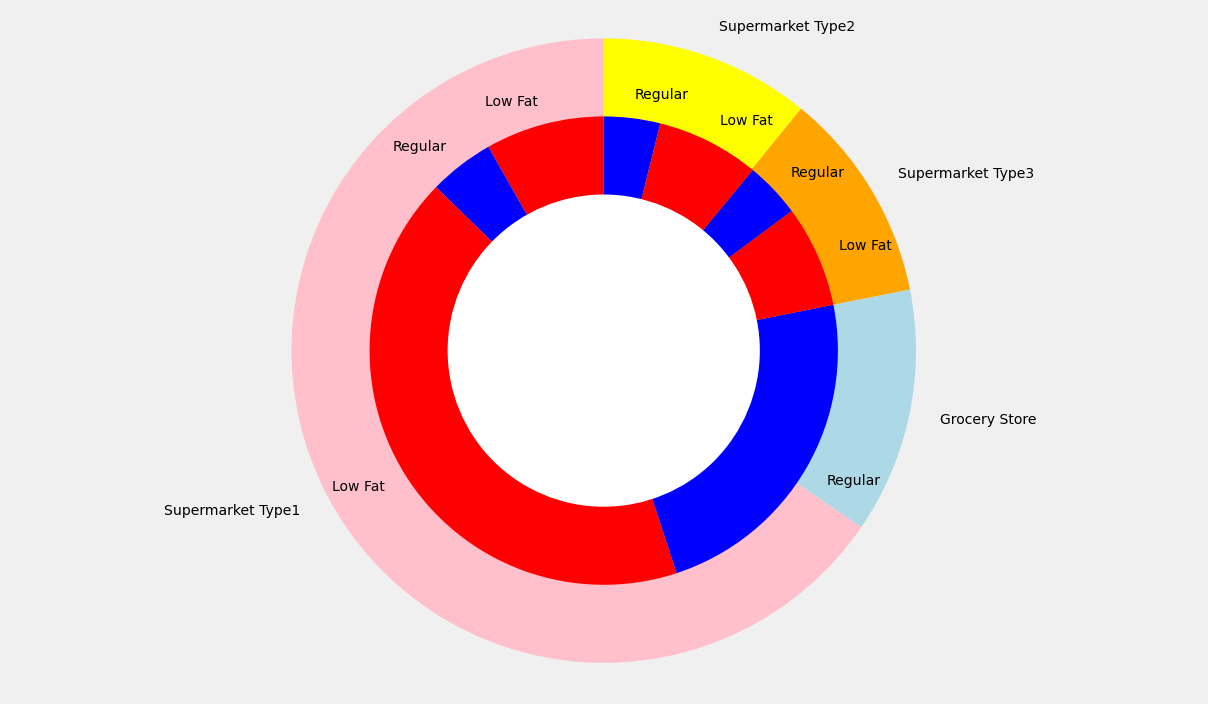

In [57]:
# Item_Fat_Content of items sold by each Outlet_Type

labels = train['Outlet_Type'].unique()

sizes = train['Outlet_Type'].value_counts()

labels_fat = ['Low Fat','Regular','Low Fat','Regular','Low Fat','Regular','Low Fat','Regular']

sizes_fat = [1165, 640, 6013, 3281, 999, 547, 1008, 551]

colors = ['pink', 'lightblue', 'orange', 'yellow']

colors_gender = ['red','blue', 'red','blue', 'red','blue', 'red','blue']
 
# Plot

plt.figure(figsize = (17, 10))

plt.pie(sizes, labels = labels, colors = colors, startangle = 90, frame = True)

plt.pie(sizes_fat, labels = labels_fat, colors = colors_gender, radius = 0.75, startangle = 90)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.tight_layout()

plt.show()

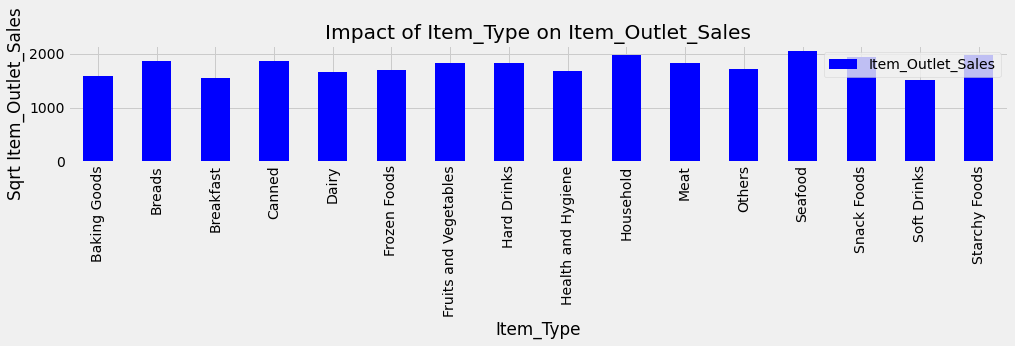

In [60]:
# impact of Item_MRP and Item_VIsibility on Item_Outlet_Sales

Outlet_Establishment_Year_pivot = \
train.pivot_table(index = 'Item_Type', values = "Item_Outlet_Sales", aggfunc = np.median)

Outlet_Establishment_Year_pivot.plot(kind = 'bar', color = 'blue', figsize = (15, 2))

plt.xlabel("Item_Type")

plt.ylabel("Sqrt Item_Outlet_Sales")

plt.title("Impact of Item_Type on Item_Outlet_Sales")

plt.xticks(rotation = 90)

plt.show()

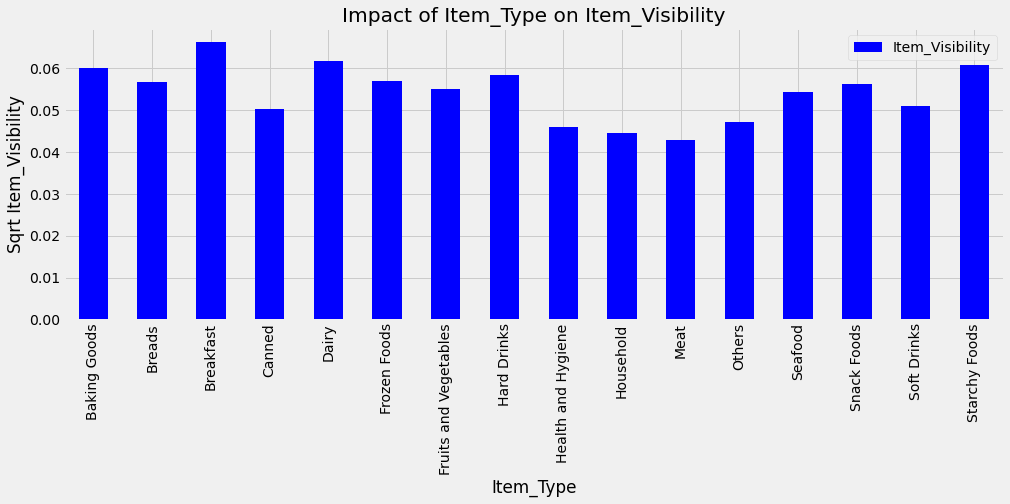

In [61]:
# impact of Item_Type on Item_Visibility

Outlet_Establishment_Year_pivot = \
train.pivot_table(index = 'Item_Type', values = "Item_Visibility", aggfunc = np.median)

Outlet_Establishment_Year_pivot.plot(kind = 'bar', color = 'blue',figsize = (15, 5))

plt.xlabel("Item_Type")

plt.ylabel("Sqrt Item_Visibility")

plt.title("Impact of Item_Type on Item_Visibility")

plt.xticks(rotation=90)

plt.show()

# Trivariate Analysis

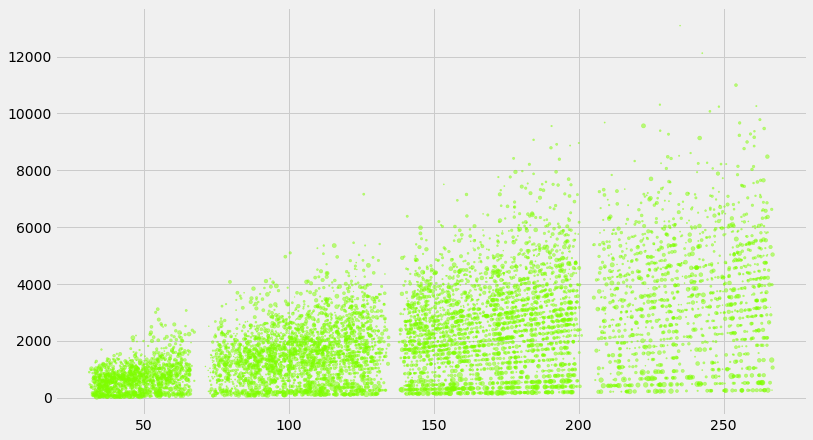

In [62]:
# impact of Item_MRP and Item_VIsibility on Item_Outlet_Sales

plt.figure(figsize = (12, 7))

x = train['Item_MRP']

y = train['Item_Visibility']

z = train['Item_Outlet_Sales']

plt.scatter(x, z, s = y*100, c = 'Chartreuse', alpha = 0.5) 

# HYPOTHESIS TESTING

# H0 : mean <= 2500

# H1 : mean > 2500


In [63]:
sample_it_out_sales = it_out_sales_drpna.sample(n = 100) 

sample_it_out_sales

7546      2328.9684
6690     10236.6750
8459      2026.0294
9288      1924.1620
8119      1379.5376
            ...    
11241     2731.1116
13808     6008.1792
9364      3528.7400
9864       355.5372
11612     1312.9576
Name: Item_Outlet_Sales, Length: 100, dtype: float64

In [64]:
sam_it_out_sales_mean = sample_it_out_sales.mean()

sam_it_out_sales_std = sample_it_out_sales.std()

In [65]:
pop_mean = it_out_sales_drpna.mean()

print(pop_mean)

2181.2889135750365


In [66]:
n = 100

z_score = (sam_it_out_sales_mean - 2500) / (sam_it_out_sales_std / n**0.5)

print(round(z_score,2))

-1.98


In [67]:
# alpha = 0.05 confidence interval = 95%, We need to perform lower tail test as H1: sample_mean <2500

# Since p > 0.05, we don't  reject the null hypothesis

# Hypothesis testing's result is verified as population mean = 2181.29 which is lesser than 2500

p = 0.2061

print(round(p, 3))

0.206


In [68]:
# H0 : The mean Item_MRP for the population is equal to 150
# H0 : mean = 150
# H1 : mean > 150 

sample_it_mrp = train['Item_MRP'].sample(n = 100) 

pop_std_it_mrp = train['Item_MRP'].std()

print(round(pop_std_it_mrp, 3))

sam_it_mrp_mean = sample_it_mrp .mean()

sam_it_mrp_std = sample_it_mrp .std()

pop_mean_it_mrp = train['Item_MRP'].mean()

print(round(pop_mean_it_mrp, 3))

62.087
141.005


In [69]:
n = 100

z_score1 = (sam_it_mrp_mean - 150) / (sam_it_mrp_std / (n**0.5))

print(round(z_score1, 2))

-1.79


In [ ]:
#test statistic values are -1.45 and 1.45

# -3.5 < Z(alpha)

# -3.5 < -1.96

# The test statistic is in the rejection region, so H0 is  rejected

# Population mean is not equal to 150

In [70]:
# alpha= 0.05 confidence interval = 95%

# We perform 2 tail test as H1: sample_mean > 150

# Since p < 0.05, we reject the null hypothesis

# Hypothesis testing's result is verified as population mean = 141.005 which is not equal to 150

p_value = (2 * 0.0735)

print(p_value)

0.147


In [71]:
# Correlation between Item_Visibility and Item_Outlet_Sales

corr_coff1 = train.corr(method = 'pearson')['Item_Visibility']['Item_Outlet_Sales']

print(corr_coff1)

-0.12862461222076968


In [1]:
#Visualizing the correlation between Item_Outlet_Sales and Item_Visibility 

numeric_features = train.select_dtypes(include = [np.number])

numeric_features.dtypes

corr = numeric_features.corr()

corr

NameError: name 'train' is not defined

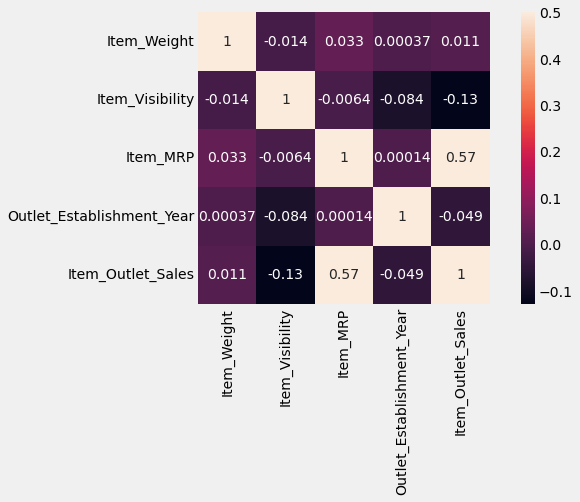

In [76]:
# correlation matrix

f, ax = plt.subplots(figsize = (10, 5))

sns.heatmap(corr, annot = True, vmax = 0.5, square = True);